In [684]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
import matplotlib as mpl
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import tensorflow as ts
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [685]:
def RSS(w,X,y):
    v = (w * X.T) - y
    return np.linalg.norm(v,axis=1)**2

In [686]:
def plot_cost_function(n_samples):
    X,t = make_regression(n_features=2, n_samples=n_samples)
    X = np.asmatrix(X)
    t = np.asmatrix(t)
    x = np.arange(-2000, 2000, 20)
    y = np.arange(-2000, 2000, 20)
    XX, YY = np.meshgrid(x, y)
    parameters = np.matrix([XX.ravel().T,YY.ravel().T]).T
    Z = RSS(parameters,X,t)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(XX,YY,np.reshape(Z,XX.shape),cmap=cm.coolwarm)
    plt.show()
    #data = [
    #    go.Surface(x=XX, y=YY, z=np.reshape(Z,XX.shape))
    #]
    #layout = go.Layout(
    #    title='Linear regression cost function',
    #    autosize=False,
    #    width=100,
    #    height=100,
    #    margin=dict(
    #        l=0,
    #        r=0,
    #        b=0,
    #        t=0
    #    )
    #)
    #fig = go.Figure(data=data)
    #iplot(fig)

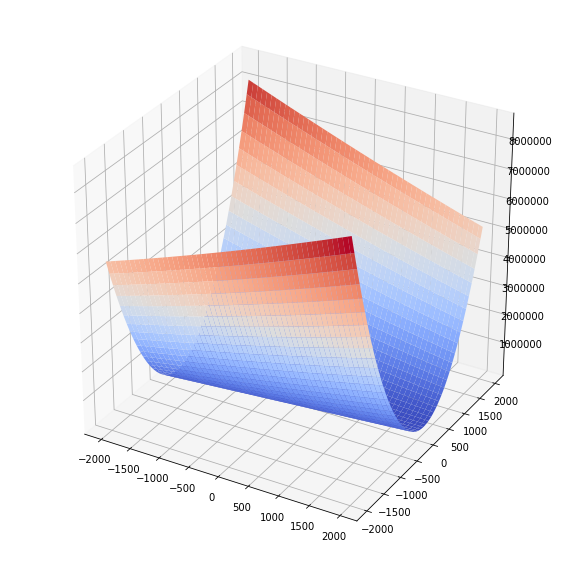

In [687]:
plot_cost_function(1)

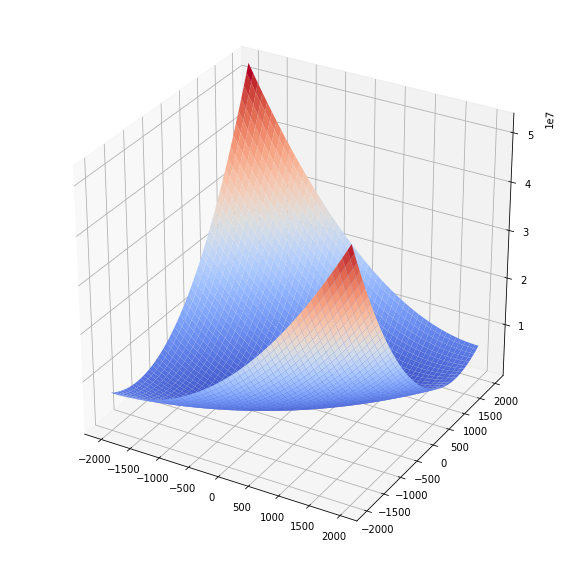

In [688]:
plot_cost_function(2)

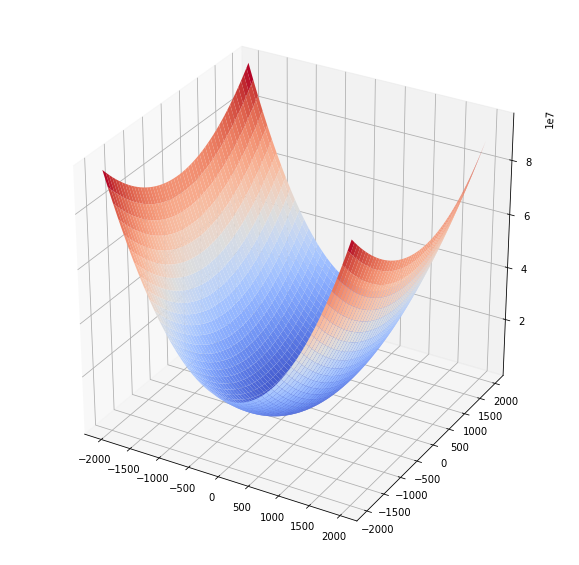

In [693]:
plot_cost_function(10)

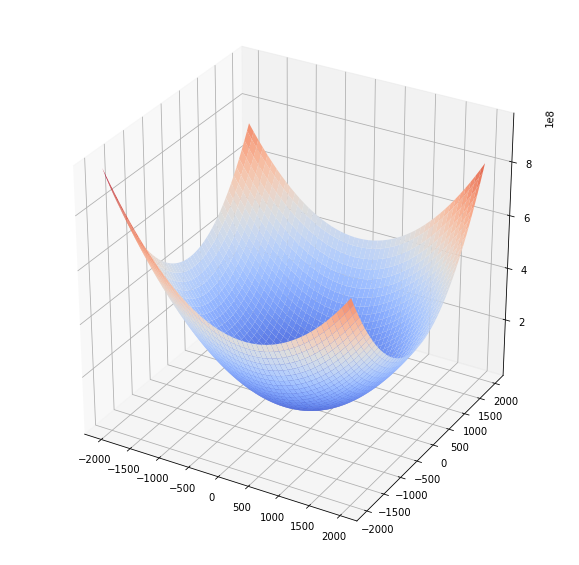

In [690]:
plot_cost_function(100)

In [292]:
import tensorflow as tf

In [293]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [694]:
def compare_normal_equations_with_gradient(features, percentage, learning_rate=0.01,n_epochs=2000):
    X_reg,t_reg = make_regression(n_features=features,n_samples=features + int(percentage*features))
    X_reg = np.matrix(X_reg)
    t = np.matrix(t_reg.reshape(-1, 1))
    theta_numpy = np.linalg.inv(X_reg.T.dot(X_reg)).dot(X_reg.T).dot(t)
    error = (X_reg*theta_numpy - t)
    normal_mse = (error.T*error).item()

    reset_graph()
    
    X = tf.constant(X_reg, dtype=tf.float32, name="X")
    y = tf.constant(t.reshape(-1, 1), dtype=tf.float32, name="y")
    theta = tf.Variable(tf.random_uniform([features, 1], -10, 10, seed=42), name="theta")
    y_pred = tf.matmul(X, theta, name="predictions")
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

    gradients = tf.gradients(mse, [theta])[0]

    training_op = tf.assign(theta, theta - learning_rate * gradients)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epochs):
            sess.run(training_op)
        best_theta = theta.eval()
        gradient_norm = np.linalg.norm(gradients.eval())
        gradient_descent_mse = mse.eval()
        
    solutions_distance = np.linalg.norm(best_theta-theta_numpy)
    
    return (solutions_distance, gradient_descent_mse, gradient_norm)

In [695]:
def compare_by_learning_rate(learning_rate):
    for n_features in features:
        print("Features = ", n_features)
        for percentage in percentages:
            solutions_distance, gradient_descent_mse, gradient_norm = compare_normal_equations_with_gradient(n_features,percentage, learning_rate=learning_rate)
            print("     % = ",percentage, " distance = ", solutions_distance, " mse = ", gradient_descent_mse, "gradient norm = ", gradient_norm)

In [696]:
compare_by_learning_rate(0.01)

Features =  10
     % =  0  distance =  78.14710582205485  mse =  20.603693 gradient norm =  1.0637608
     % =  0.1  distance =  8.385505234315808  mse =  2.6642418 gradient norm =  0.64491594
     % =  0.2  distance =  11.281881465000172  mse =  6.8180275 gradient norm =  1.2302296
     % =  0.3  distance =  4.207032716026745  mse =  1.1194879 gradient norm =  0.56161934
     % =  0.4  distance =  7.319785782316684  mse =  3.020644 gradient norm =  0.8260232
     % =  0.5  distance =  6.33174645426327  mse =  2.1560974 gradient norm =  0.70060354
     % =  0.6  distance =  5.662583792744997  mse =  1.4365284 gradient norm =  0.50840163
     % =  0.7  distance =  1.6695421826270183  mse =  0.2435777 gradient norm =  0.29290968
     % =  0.8  distance =  4.029966596143569  mse =  1.2989614 gradient norm =  0.6446505
     % =  0.9  distance =  0.5225826989972484  mse =  0.033334415 gradient norm =  0.12757066
     % =  1  distance =  0.8401024428461916  mse =  0.08362937 gradient norm =

In [697]:
compare_by_learning_rate(0.23)

Features =  10
     % =  0  distance =  0.20482087600909873  mse =  0.0002134237 gradient norm =  0.0020835677
     % =  0.1  distance =  0.00013033692233842134  mse =  5.7481225e-10 gradient norm =  1.2765817e-05
     % =  0.2  distance =  0.00021783247650567958  mse =  1.7384233e-09 gradient norm =  2.0138843e-05
     % =  0.3  distance =  0.00022889232818454374  mse =  2.9233258e-09 gradient norm =  2.7392687e-05
     % =  0.4  distance =  0.00012813763416960036  mse =  9.2508606e-10 gradient norm =  1.7575643e-05
     % =  0.5  distance =  0.00014295570987760738  mse =  8.8652996e-10 gradient norm =  1.8804223e-05
     % =  0.6  distance =  0.00021453127607043643  mse =  2.2340592e-09 gradient norm =  2.6539985e-05
     % =  0.7  distance =  8.895022827951167e-05  mse =  5.994105e-10 gradient norm =  1.9912917e-05
     % =  0.8  distance =  9.989858585675517e-05  mse =  1.1595552e-09 gradient norm =  2.5290543e-05
     % =  0.9  distance =  5.04260852774672e-05  mse =  6.489514e-10